In [1]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Import the mandatory libraries


from warnings import filterwarnings


In [2]:
# import the ml libraries

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error



from sklearn.ensemble import ExtraTreesRegressor

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet')

In [4]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[us]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[us]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [6]:
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [7]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df['duration'] = df['duration'].apply(lambda td: td.total_seconds()/60)


df = df[(df['duration']>1) & (df['duration']<=60)]


categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [8]:
df.duration.max()

60.0

In [28]:
df[categorical+numerical]

,PULocationID,DOLocationID,trip_distance
0,166,143,2.58
1,24,43,1.81
2,223,179,0.00
3,41,238,1.30
4,41,74,1.10
...,...,...,...
68206,49,62,4070.82
68207,10,205,2.14
68208,66,37,3.44
68209,225,189,3.03


In [9]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.056710707362012

In [29]:
train_dicts

[{'PULocationID': '74', 'DOLocationID': '265', 'trip_distance': 10.8},
 {'PULocationID': '216', 'DOLocationID': '196', 'trip_distance': 4.76},
 {'PULocationID': '7', 'DOLocationID': '114', 'trip_distance': 6.32},
 {'PULocationID': '74', 'DOLocationID': '239', 'trip_distance': 3.5},
 {'PULocationID': '82', 'DOLocationID': '223', 'trip_distance': 3.14},
 {'PULocationID': '92', 'DOLocationID': '121', 'trip_distance': 2.52},
 {'PULocationID': '244', 'DOLocationID': '42', 'trip_distance': 1.96},
 {'PULocationID': '75', 'DOLocationID': '41', 'trip_distance': 1.46},
 {'PULocationID': '95', 'DOLocationID': '121', 'trip_distance': 2.38},
 {'PULocationID': '97', 'DOLocationID': '97', 'trip_distance': 0.88},
 {'PULocationID': '75', 'DOLocationID': '74', 'trip_distance': 0.83},
 {'PULocationID': '112', 'DOLocationID': '188', 'trip_distance': 5.25},
 {'PULocationID': '95', 'DOLocationID': '135', 'trip_distance': 1.43},
 {'PULocationID': '95', 'DOLocationID': '95', 'trip_distance': 0.51},
 {'PULocat

/tmp/ipykernel_19346/3296566480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_19346/3296566480.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


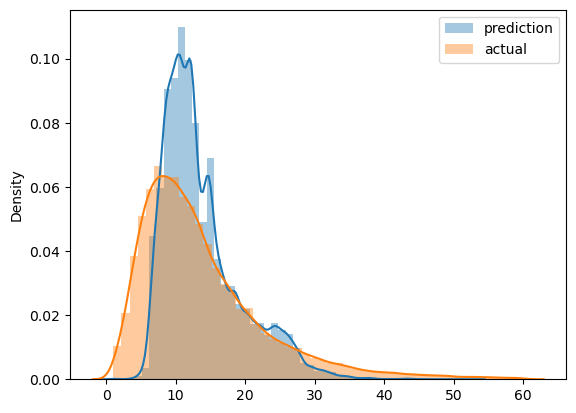

In [10]:


sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()


In [11]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [12]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet')

In [13]:
df_train.shape, df_val.shape

((62574, 21), (69392, 21))

In [14]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [15]:
df_train.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_DO
0,1,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1.0,10.80,42.9,...,0.00,0.0,NaN,1.0,45.40,2.0,1.0,0.00,19.583333,74_265
1,2,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1.0,4.76,23.3,...,0.00,0.0,NaN,1.0,25.80,2.0,1.0,0.00,17.550000,216_196
2,2,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1.0,6.32,30.3,...,8.89,0.0,NaN,1.0,44.44,1.0,1.0,2.75,23.716667,7_114
3,2,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,1.0,3.50,16.3,...,0.00,0.0,NaN,1.0,21.55,2.0,1.0,2.75,20.733333,74_239
4,2,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,1.0,3.14,17.0,...,0.00,0.0,NaN,1.0,19.50,2.0,1.0,0.00,10.950000,82_223


In [38]:
dv = DictVectorizer()
categorical = ['PULocationID','DOLocationID','PU_DO']
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [39]:
train_dicts

[{'PULocationID': '74',
  'DOLocationID': '265',
  'PU_DO': '74_265',
  'trip_distance': 10.8},
 {'PULocationID': '216',
  'DOLocationID': '196',
  'PU_DO': '216_196',
  'trip_distance': 4.76},
 {'PULocationID': '7',
  'DOLocationID': '114',
  'PU_DO': '7_114',
  'trip_distance': 6.32},
 {'PULocationID': '74',
  'DOLocationID': '239',
  'PU_DO': '74_239',
  'trip_distance': 3.5},
 {'PULocationID': '82',
  'DOLocationID': '223',
  'PU_DO': '82_223',
  'trip_distance': 3.14},
 {'PULocationID': '92',
  'DOLocationID': '121',
  'PU_DO': '92_121',
  'trip_distance': 2.52},
 {'PULocationID': '244',
  'DOLocationID': '42',
  'PU_DO': '244_42',
  'trip_distance': 1.96},
 {'PULocationID': '75',
  'DOLocationID': '41',
  'PU_DO': '75_41',
  'trip_distance': 1.46},
 {'PULocationID': '95',
  'DOLocationID': '121',
  'PU_DO': '95_121',
  'trip_distance': 2.38},
 {'PULocationID': '97',
  'DOLocationID': '97',
  'PU_DO': '97_97',
  'trip_distance': 0.88},
 {'PULocationID': '75',
  'DOLocationID': '74

In [40]:
X_train.data.reshape(2,-1)

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 2.57],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 2.61]])

In [41]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values


Initiate the model

In [42]:
model = ExtraTreesRegressor(n_estimators=300,max_depth=20,n_jobs=4,verbose=True)

Fit the model

In [43]:
X_train

<62574x6329 sparse matrix of type '<class 'numpy.float64'>'
	with 250296 stored elements in Compressed Sparse Row format>

In [44]:
model.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.7s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.6min finished


ExtraTreesRegressor(max_depth=20, n_estimators=300, n_jobs=4, verbose=True)

In [45]:
y_pred = model.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.4s finished


8.034206828113014

Create a model dump

In [35]:
with open('models/extra_trees_reg.bin','wb') as f_out:
    pickle.dump((dv,model), f_out)

In [23]:
#lets create another version of the model

model = ExtraTreesRegressor(n_estimators=3000,max_depth=20,n_jobs=4,verbose=True)

In [24]:
model.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.4s


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 3000 out of 3000 | elapsed:    6.6s finished


8.034813181553222